In [54]:
# ==========================
# Boston Police Overtime Prediction
# ==========================
# Goal: Predict OVERTIME pay using other payroll factors (2024 data)
# Model Type: Linear Regression
# ==========================

In [55]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 2: Load dataset
df = pd.read_csv('/content/cleaned_police_overtime_data.csv')

print("✅ Data Loaded Successfully!")
print("Shape:", df.shape)
display(df.head())


✅ Data Loaded Successfully!
Shape: (14057, 10)


,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,POSTAL
0,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),161306.48,105724.70,6906.86,223773.96,12.52,45597.23,2052.0
1,"Connolly,Timothy",Boston Police Department,Police Captain/DDC,178073.23,99063.23,27649.74,193677.07,126.81,7651.56,2186.0
2,"Danilecki,John H",Boston Police Department,Police Captain,177743.21,87989.27,27598.50,136562.06,130.09,70060.84,2559.0
3,"Hegarty,Michael J",Boston Police Department,Police Captain/DDC,178776.43,74772.60,21044.52,79915.58,342.63,142607.11,2032.0
4,"Sweeney,Steven",Boston Police Department,Police Captain/DDC,178072.39,94162.76,27599.74,123627.22,83.26,57658.88,2131.0


In [56]:
# Drop irrelevant columns (like name, department)
X = df.drop(columns=['NAME', 'DEPARTMENT_NAME', 'OVERTIME','TITLE'])
y = df['OVERTIME']



print("✅ Features ready for modeling!")
print("X shape:", X.shape)


✅ Features ready for modeling!
X shape: (14057, 6)


In [57]:
# Split into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

print("✅ Model training completed!")


✅ Model training completed!


📈 Model Evaluation Results:
Mean Absolute Error (MAE): $4,420.76
R² Score: 0.709


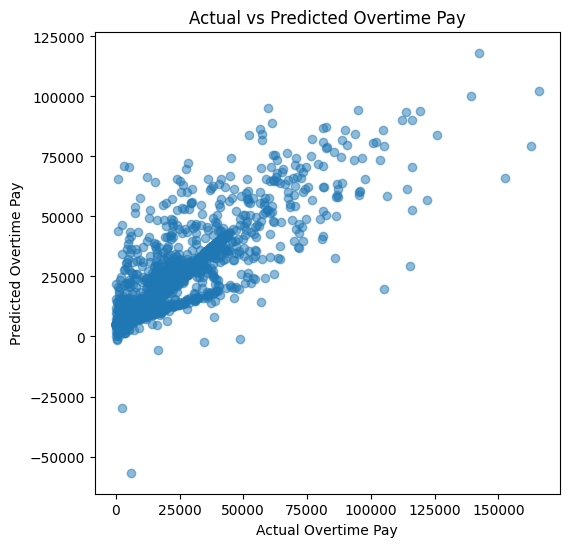

In [58]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📈 Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R² Score: {r2:.3f}")

# Visualize predicted vs actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Overtime Pay")
plt.ylabel("Predicted Overtime Pay")
plt.title("Actual vs Predicted Overtime Pay")
plt.show()


💡 Top Influential Features:


,Feature,Coefficient
1,RETRO,1.139595
5,POSTAL,0.032042
2,OTHER,-0.088933
4,DETAIL,-0.218807
0,REGULAR,-0.293658
3,INJURED,-0.888895


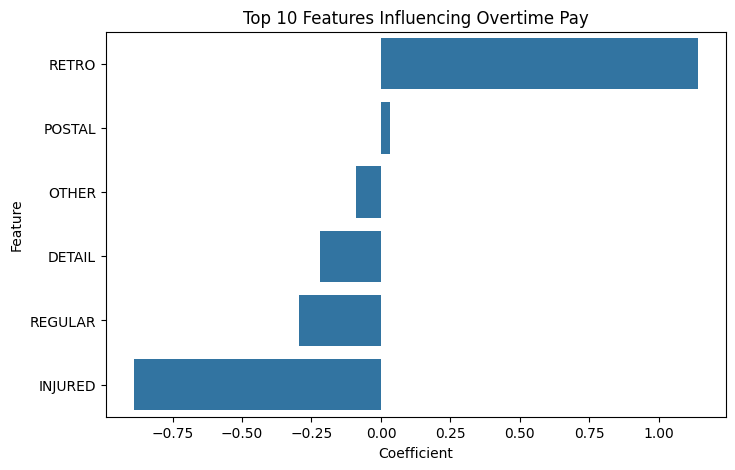

In [59]:
# Create a DataFrame of feature coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

print("💡 Top Influential Features:")
display(coef_df.head(10))

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(10))
plt.title("Top 10 Features Influencing Overtime Pay")
plt.show()


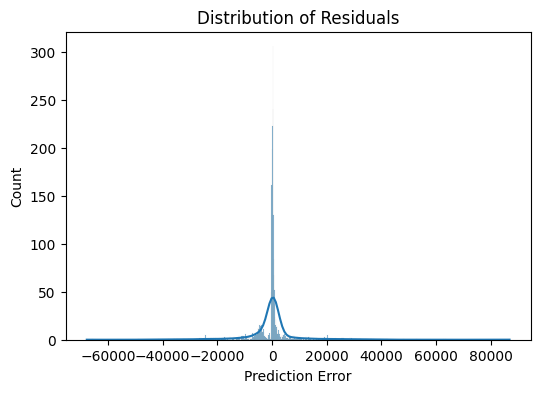

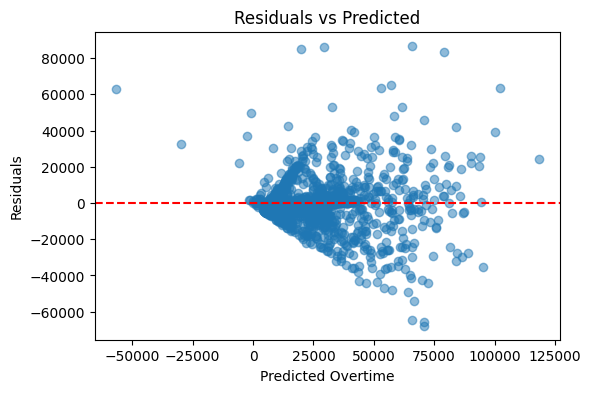

In [60]:
# Residuals = actual - predicted
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Overtime")
plt.ylabel("Residuals")
plt.show()


In [61]:
print("✅ Model is performing well with R² =", round(r2,3))
print("⚙️ You can improve further by:")
print("- Trying a Random Forest Regressor")
print("- Adding more years of data or new features (e.g. experience)")
print("- Performing feature scaling or polynomial terms for nonlinear effects")


✅ Model is performing well with R² = 0.709
⚙️ You can improve further by:
- Trying a Random Forest Regressor
- Adding more years of data or new features (e.g. experience)
- Performing feature scaling or polynomial terms for nonlinear effects


In [62]:
# =====================================================
# 📘 CELL 1: Imports and Data Loading
# =====================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Optional but useful
!pip install shap -q

import shap
shap.initjs()

# Load dataset
df = pd.read_csv("/content/cleaned_police_overtime_data.csv")

print("✅ Data Loaded Successfully!")
print("Shape:", df.shape)
df.head()


✅ Data Loaded Successfully!
Shape: (14057, 10)


,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,POSTAL
0,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),161306.48,105724.70,6906.86,223773.96,12.52,45597.23,2052.0
1,"Connolly,Timothy",Boston Police Department,Police Captain/DDC,178073.23,99063.23,27649.74,193677.07,126.81,7651.56,2186.0
2,"Danilecki,John H",Boston Police Department,Police Captain,177743.21,87989.27,27598.50,136562.06,130.09,70060.84,2559.0
3,"Hegarty,Michael J",Boston Police Department,Police Captain/DDC,178776.43,74772.60,21044.52,79915.58,342.63,142607.11,2032.0
4,"Sweeney,Steven",Boston Police Department,Police Captain/DDC,178072.39,94162.76,27599.74,123627.22,83.26,57658.88,2131.0


In [63]:
# =====================================================
# 📘 CELL 2: Data Preprocessing
# =====================================================

# Encode categorical column (TITLE)
le = LabelEncoder()
df['TITLE_ENC'] = le.fit_transform(df['TITLE'])

# Define features and target
X = df[['REGULAR', 'RETRO', 'OTHER', 'INJURED', 'DETAIL','POSTAL','TITLE_ENC']]
y = df['OVERTIME']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)


Training Shape: (11245, 7)
Testing Shape: (2812, 7)


In [64]:
# =====================================================
# 📘 CELL 3: Train Random Forest Regressor
# =====================================================
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Random Forest Model Trained Successfully!")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R² Score: {r2:.3f}")


✅ Random Forest Model Trained Successfully!
Mean Absolute Error (MAE): $2,838.64
R² Score: 0.813


/tmp/ipython-input-3881123663.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="Blues_r")


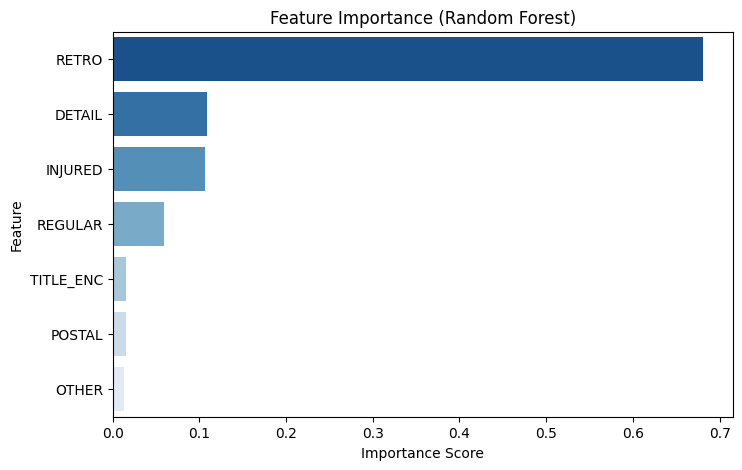

In [65]:
# =====================================================
# 📘 CELL 4: Feature Importance Visualization
# =====================================================
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index, palette="Blues_r")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


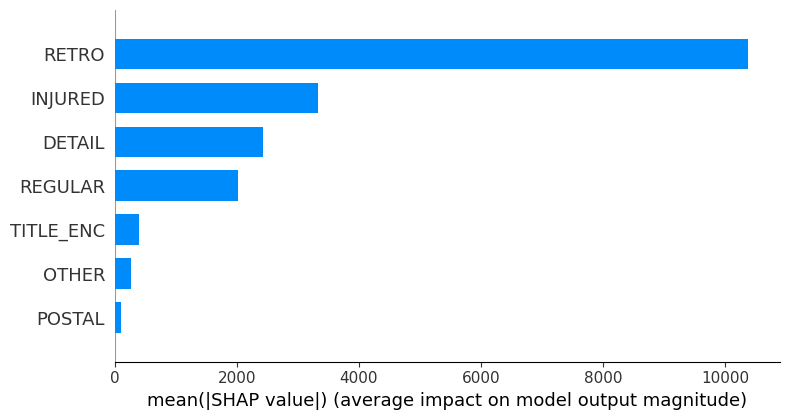

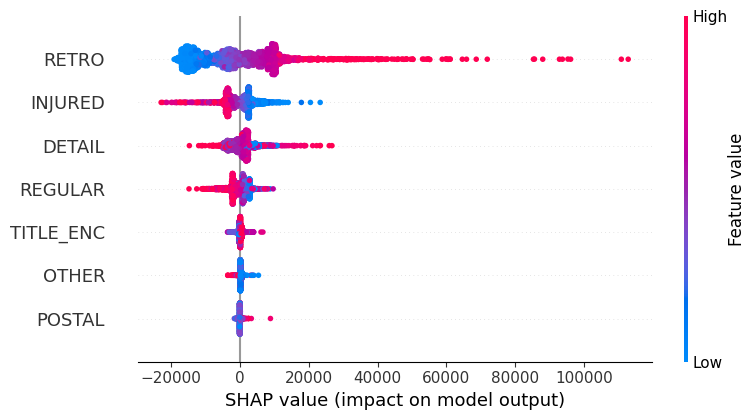

In [66]:
# =====================================================
# 📘 CELL 5: SHAP Explainability (Model Interpretation)
# =====================================================
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Global Feature Importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed Impact (beeswarm)
shap.summary_plot(shap_values, X_test)


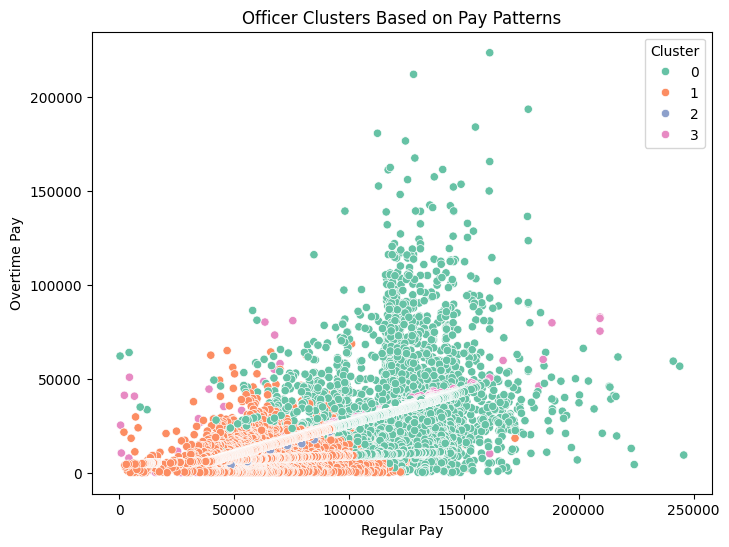

In [67]:
# =====================================================
# 📘 CELL 6: K-Means Clustering on Officer Pay Patterns
# =====================================================
from sklearn.cluster import KMeans

# Scale numerical features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['REGULAR', 'DETAIL', 'OVERTIME', 'OTHER','POSTAL', 'INJURED']])

# Fit KMeans (try 3–4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['REGULAR'],
    y=df['OVERTIME'],
    hue=df['Cluster'],
    palette='Set2'
)
plt.title("Officer Clusters Based on Pay Patterns")
plt.xlabel("Regular Pay")
plt.ylabel("Overtime Pay")
plt.legend(title="Cluster")
plt.show()


,REGULAR,DETAIL,OVERTIME,OTHER,INJURED,POSTAL
Cluster,,,,,,
0,122091.696192,24741.313575,35156.107792,3731.614017,9966.089000,2150.545770
1,65840.990168,19572.997280,11652.646457,2232.987652,31809.674663,2165.002856
2,73613.942857,6351.195656,13311.050787,16628.092143,34497.099041,24984.928571
3,91523.849435,14574.204733,26902.806965,36779.762027,29502.578894,2192.019934


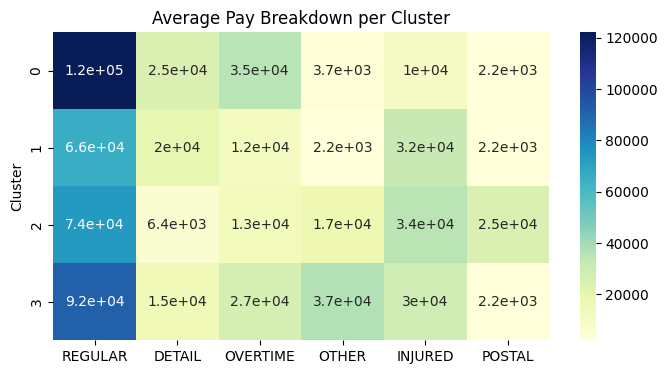

In [68]:
# =====================================================
# 📘 CELL 7: Cluster Analysis Summary
# =====================================================
cluster_summary = df.groupby('Cluster')[['REGULAR', 'DETAIL', 'OVERTIME', 'OTHER', 'INJURED','POSTAL']].mean()
display(cluster_summary)

plt.figure(figsize=(8, 4))
sns.heatmap(cluster_summary, annot=True, cmap="YlGnBu")
plt.title("Average Pay Breakdown per Cluster")
plt.show()


In [69]:
# =====================================================
# 📘 XG Boost CELL 2: Data Preprocessing
# =====================================================

# Encode categorical column (TITLE)
le = LabelEncoder()
df['TITLE_ENC'] = le.fit_transform(df['TITLE'])

# Define features and target
X = df[['REGULAR', 'RETRO', 'OTHER', 'INJURED', 'DETAIL', 'POSTAL','TITLE_ENC']]
y = df['OVERTIME']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)


Training Shape: (11245, 7)
Testing Shape: (2812, 7)


In [70]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [71]:
# Initialize and train XGBoost model
# Import the XGBRegressor from xgboost
from xgboost import XGBRegressor as xgb
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [72]:
# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ XGBoost Model Trained Successfully!")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R² Score: {r2:.3f}")


✅ XGBoost Model Trained Successfully!
Mean Absolute Error (MAE): $2,756.10
R² Score: 0.820


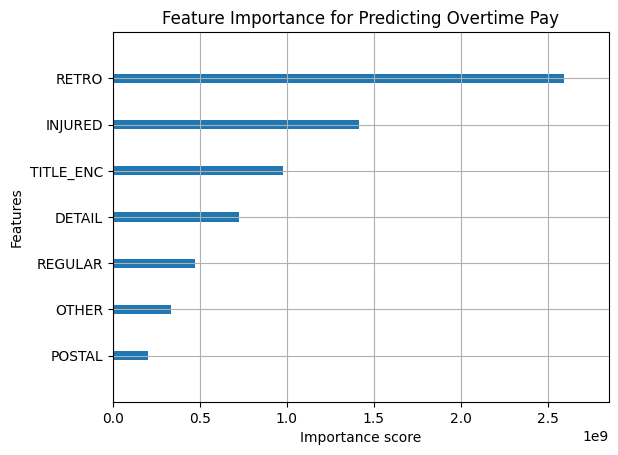

In [73]:
# Plot importance of features
from xgboost import XGBRegressor, plot_importance
plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title("Feature Importance for Predicting Overtime Pay")
plt.show()


ExactExplainer explainer: 301it [00:48,  4.83it/s]


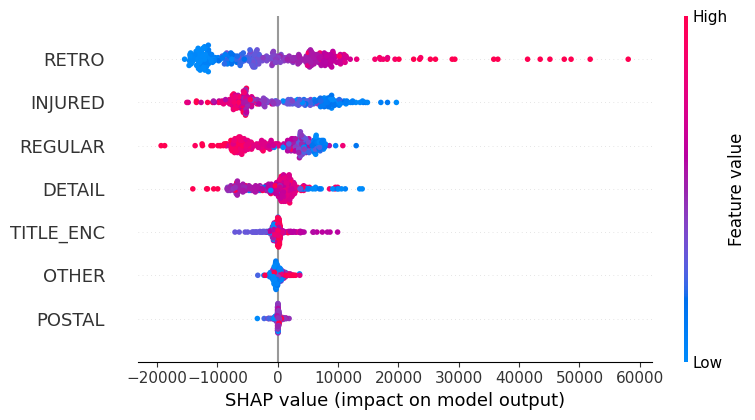

In [74]:
import shap
import numpy as np

# SHAP works best on a small sample for visualization speed
X_sample = X_test.sample(300, random_state=42)

# Build an explainer directly from the prediction function
explainer = shap.Explainer(
    lambda X: xgb_model.predict(X),
    X_sample
)

# Compute SHAP values
shap_values = explainer(X_sample)

# Global importance plot
shap.summary_plot(shap_values, X_sample)


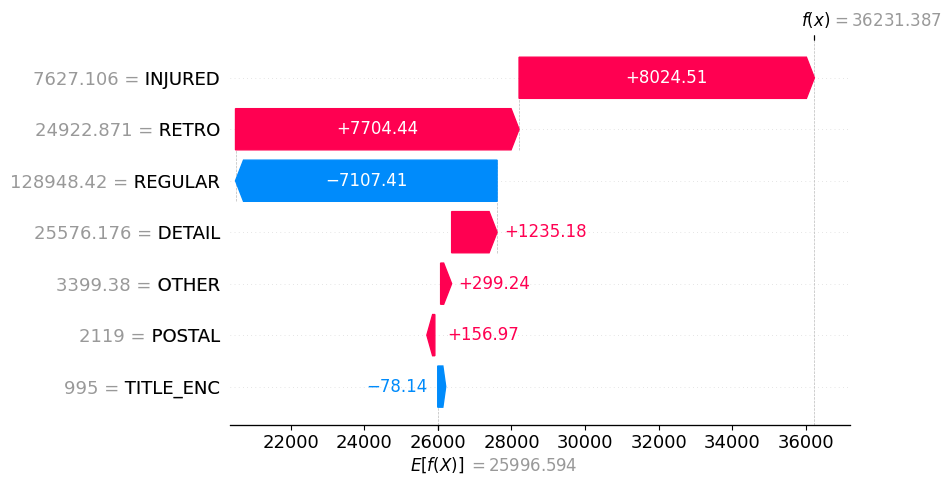

In [75]:
# Show why the model predicted what it did for one example
shap.plots.waterfall(shap_values[0])